## Assignment 2 - Nishita Matlani(002866323)

### **Introduction to Causality**

Causality is a fundamental concept in various fields such as philosophy, statistics, computer science, and physics. It deals with the relationship between causes and effects, aiming to understand how one event influences another. This chapter delves into the principles of causality, mathematical formulations, and methods to infer causal relationships from data. 

It is the relationship between causes and effects. It helps us understand how one event or action leads to another, allowing us to predict and influence outcomes. Unlike mere correlation, causality identifies a direct link where a change in one variable (the cause) directly affects another variable (the effect).

Key concepts in causality include:
1. **Cause**: The initiating event, action, or condition.
2. **Effect**: The outcome or result that follows from the cause.
3. **Causal Mechanism**: The process or pathway through which the cause produces the effect.

For example:
- Cause: Increased calorie intake.
- Effect: Weight gain.
- Causal Mechanism: Excess calories are stored as fat in the body.


Causality seeks to answer questions like "Does X cause Y?" rather than merely "Are X and Y correlated?". Understanding causality enables us to predict the effects of interventions, make informed decisions, and understand the underlying mechanisms of observed phenomena.

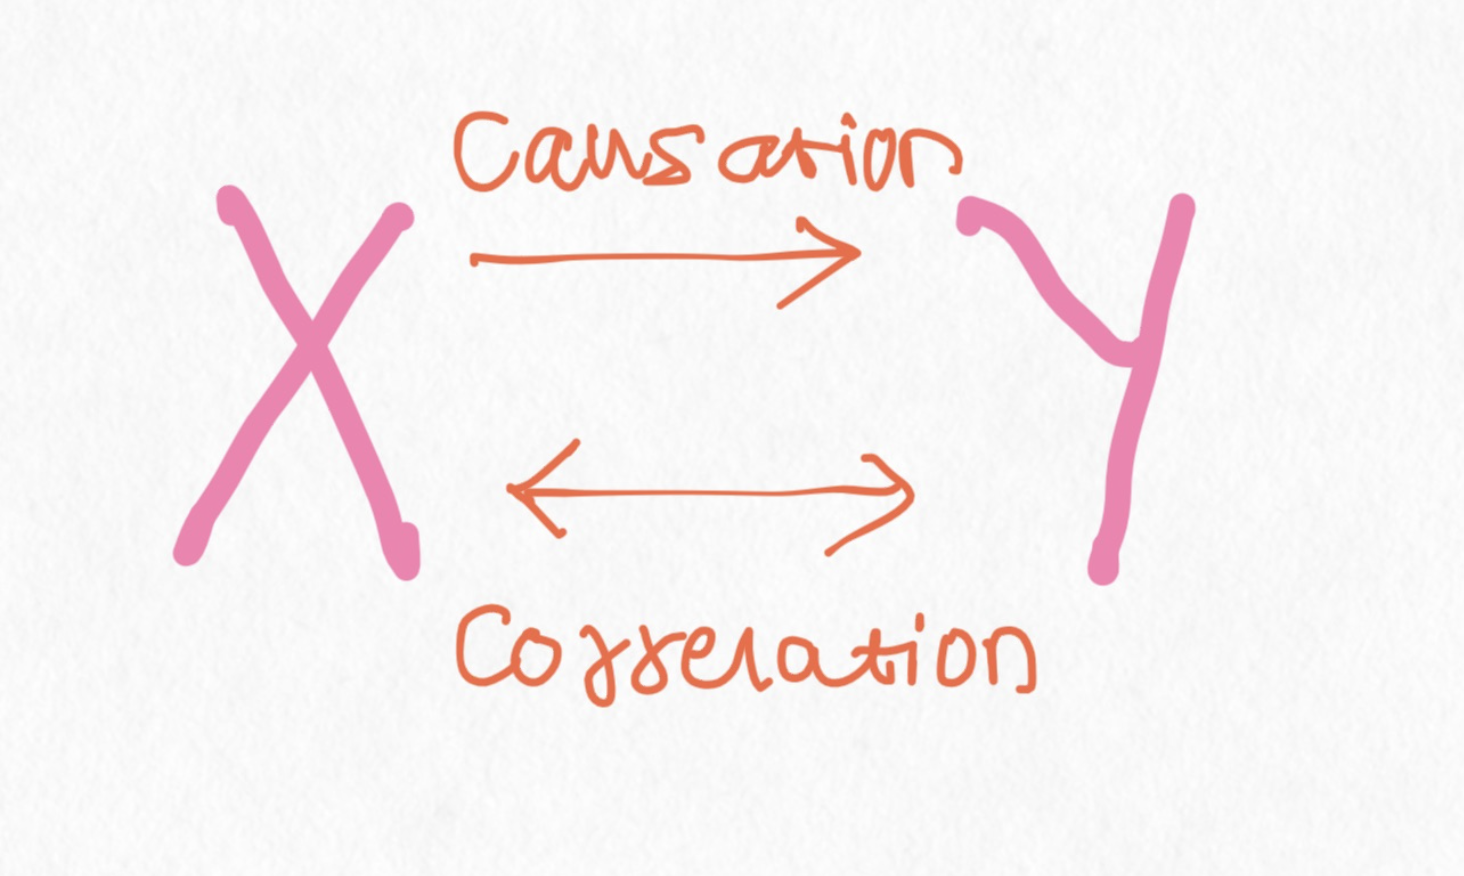

## Correlation vs. Causation

**Correlation** measures the statistical association between two variables but does not imply causation. Two variables can be correlated due to a lurking third variable or mere coincidence.

### Mathematical Representation of Correlation

The Pearson correlation coefficient between variables **X** and **Y** is given by:

<img src="http://localhost:8889/files/Documents/ADS/assignment_2_Nishita_Matlani/images/correlation.png?_xsrf=2%7C538f649c%7C5c2974fba13cc250e9cb57e001704e46%7C1731110193" alt="correlation formula" width="500">


where:

- **Cov(X, Y)** is the covariance,
- **σ_X** and **σ_Y** are the standard deviations of **X** and **Y**, respectively.



Correlation measures how two variables move together, without proving that one causes the other. Causality, on the other hand, is the study of cause-and-effect relationships. It seeks to answer questions like:  

- Why does something happen?  
- What happens if we change something?  
- How can we influence an outcome?  

Unlike correlation, causality requires more than observing patterns; it involves uncovering the mechanisms that explain those patterns.


#### Key Concepts in Causality:
1. **Cause**: The event or factor that produces an effect.  
   Example: Turning on a switch (cause) makes the light bulb glow (effect).

2. **Effect**: The outcome that results from the cause.  
   Example: The glowing light bulb is the effect of flipping the switch.

3. **Causal Mechanism**: The process or series of steps through which the cause leads to the effect.  
   Example: Flipping the switch completes an electrical circuit, which powers the light bulb.

4. **Counterfactual**: A hypothetical scenario where the cause is absent, used to test causality.  
   Example: "If the switch hadn't been flipped, the light bulb wouldn't have glowed."

### A Simple Illustration of Causality

Consider a familiar scenario: watering a plant.

**Diagram Idea:**


<img src="http://localhost:8889/files/Documents/ADS/assignment_2_Nishita_Matlani/images/Example1.png?_xsrf=2%7C538f649c%7C5c2974fba13cc250e9cb57e001704e46%7C1731110193" alt="watering the plant" width="500">

**What if?**  
- Ask, "What if I didn't water the plant?" (Counterfactual).  
  The answer: The plant would wilt and not grow. This confirms that watering is a cause of growth.

---

### Why Causality Matters

Causality is essential because:
1. It enables **prediction**: If we understand a causal relationship, we can predict what will happen if we intervene.  
   Example: If a doctor knows a drug cures a disease, prescribing the drug will likely improve the patient's condition.

2. It drives **decision-making**: Governments, businesses, and individuals make informed choices based on cause-effect understanding.  
   Example: A policymaker imposes a tax on sugary drinks, expecting it to reduce obesity rates.

3. It supports **scientific discovery**: Causality helps explain why phenomena occur, which is critical for advancing knowledge.  
   Example: In medicine, causality helps identify why certain factors (like smoking) lead to diseases (like lung cancer).


**Detailed Diagram Example**  
<img src="images/example2.png" alt="amoking example" width="500">

Causality is essential because it helps us **predict outcomes** based on interventions, guiding actions with confidence. For instance, if a doctor knows a drug cures a disease, prescribing it will likely improve the patient’s condition. It also drives **decision-making** by enabling targeted solutions; for example, a tax on sugary drinks can reduce obesity by discouraging consumption. Lastly, causality supports **scientific discovery** by explaining "why" phenomena occur, such as understanding how smoking leads to lung cancer through cellular damage caused by carcinogens. These insights ensure actions are evidence-based and impactful.

### The Math Behind Establishing Causality


#### **Regression Analysis for causality**
In the dataset, a multiple linear regression model can determine how strongly each factor influences the Happiness Score.

<img src="images/happiness_index_formula.png" alt="regression analysis" width="500">



   **Example:**  
   If B1 for GDP per capita is 0.7, a unit increase in GDP results in a 0.7-point increase in the Happiness Score, assuming all other variables are held constant.

2. **Hypothesis Testing**  
   We test the significance of each variable using p-values:
   - **Null Hypothesis**: The variable has no effect on happiness (\( \beta = 0 \)).
   - **Alternative Hypothesis**: The variable affects happiness (\( \beta \neq 0 \)).

   Variables with p-values < 0.05 are considered statistically significant causes.

3. **Counterfactual Analysis**  
   A counterfactual approach examines what would happen to happiness if a variable (e.g., GDP) were different.  
   Example:
   - "What if a country’s GDP increased by 10%?"  
   - Using the regression model, predict the new Happiness Score to estimate the causal effect.

In [4]:
# Installing necessary libraries with a slight variation in method
!pip install -q lingam dowhy causal-learn
!pip install numpy
!pip install pandas


In [5]:
# Importing libraries with revised style and additional utilities
import os
import pandas as pd
import numpy as np
from lingam import DirectLiNGAM
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Inspecting available data files in a local directory
data_dir = '/Users/nishitamatlani/Documents/ADS/assignment_2/TEH_World_Happiness_2015_2019_Imputed.csv'
if not os.path.exists(data_dir):
    print(f"Directory '{data_dir}' does not exist. Please ensure the path is correct.")
else:
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.csv'):
                print(f"Found CSV: {os.path.join(root, file)}")


In [6]:
# Load the dataset
file_path = '/Users/nishitamatlani/Documents/ADS/assignment_2/TEH_World_Happiness_2015_2019_Imputed.csv'

try:
    data = pd.read_csv(file_path)
    print(f"Data loaded successfully! Shape: {data.shape}")
    print(data.head())  # Display the first few rows of the dataset
except Exception as e:
    print(f"Error loading dataset: {e}")


Data loaded successfully! Shape: (782, 10)
       Country  Happiness rank  Happiness Score  GDP per capita  \
0  Switzerland               1            7.587         1.39651   
1      Iceland               2            7.561         1.30232   
2      Denmark               3            7.527         1.32548   
3       Norway               4            7.522         1.45900   
4       Canada               5            7.427         1.32629   

   Social support  Healthy life  Freedom  Generosity  Corruption  Year  
0         1.34951       0.94143  0.66557     0.29678     0.41978  2015  
1         1.40223       0.94784  0.62877     0.43630     0.14145  2015  
2         1.36058       0.87464  0.64938     0.34139     0.48357  2015  
3         1.33095       0.88521  0.66973     0.34699     0.36503  2015  
4         1.32261       0.90563  0.63297     0.45811     0.32957  2015  


### Data Preprocessing Steps

1. **Separate Numeric and Non-Numeric Columns:**
   - Extract numeric columns using `select_dtypes(include=[np.number])`.
   - Extract non-numeric columns using `select_dtypes(exclude=[np.number])`.

2. **Handle Missing Values:**
   - Replace missing values in numeric columns with their respective column means using `.fillna()`.

3. **Recombine Processed Data:**
   - Combine the non-numeric and numeric data back into a single DataFrame using `pd.concat()`.

4. **Verify Missing Values:**
   - Print the count of missing values in each column to ensure proper handling.


In [8]:
# Separate numeric and non-numeric columns
numeric_data = data.select_dtypes(include=[np.number])
non_numeric_data = data.select_dtypes(exclude=[np.number])

# Fill missing values in numeric columns with their column means
numeric_data = numeric_data.fillna(numeric_data.mean())

# Recombine numeric and non-numeric columns
data = pd.concat([non_numeric_data, numeric_data], axis=1)

# Verify that missing values are handled
print("Missing values after processing:\n", data.isnull().sum())


Missing values after processing:
 Country            0
Happiness rank     0
Happiness Score    0
GDP per capita     0
Social support     0
Healthy life       0
Freedom            0
Generosity         0
Corruption         0
Year               0
dtype: int64


In [9]:
# Ensure that only numeric columns are considered for causal analysis
numeric_columns = numeric_data.columns
print(f"Numeric columns considered for causal analysis: {numeric_columns.tolist()}")


Numeric columns considered for causal analysis: ['Happiness rank', 'Happiness Score', 'GDP per capita', 'Social support', 'Healthy life', 'Freedom', 'Generosity', 'Corruption', 'Year']


### Visualizing the Distribution of Numeric Columns

- **Histogram Plot:**
  - Visualize the distribution of all numeric columns in the dataset using `hist()`.
  - Parameters:
    - `bins=20`: Specifies the number of bins for the histogram.
    - `figsize=(14, 12)`: Sets the size of the figure.
    - `color="skyblue"`: Assigns a light blue color to the bars.
    - `edgecolor="black"`: Highlights the edges of the bars for better visibility.

- **Title:**
  - Add a title to the plot using `plt.suptitle()` for clarity.

- **Display:**
  - Use `plt.show()` to render the plot.


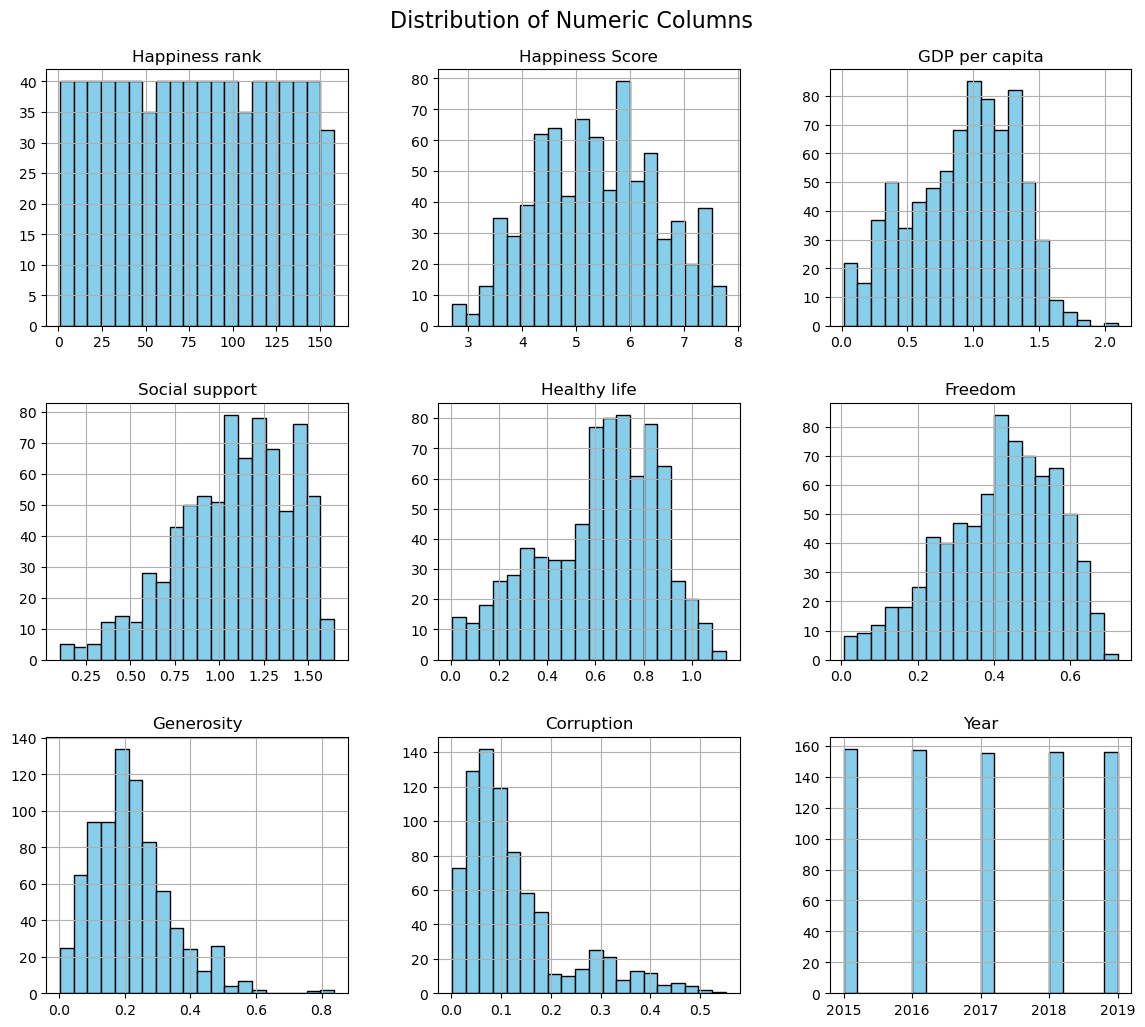

In [11]:
numeric_data.hist(bins=20, figsize=(14, 12), color="skyblue", edgecolor="black")
plt.suptitle("Distribution of Numeric Columns", fontsize=16, y=0.93)
plt.show()


### Scatter Plot: Happiness Score vs GDP per Capita

- **Purpose:**
  - Visualize the relationship between `GDP per capita` and `Happiness Score` across different years.

- **Steps:**
  1. **Create a Scatter Plot:**
     - Use `sns.scatterplot()` to create the scatter plot.
     - **Parameters:**
       - `x='GDP per capita'`: Sets the x-axis to GDP per capita.
       - `y='Happiness Score'`: Sets the y-axis to Happiness Score.
       - `data=numeric_data`: Specifies the data source.
       - `hue='Year'`: Adds color differentiation based on the `Year` column.
       - `palette='viridis'`: Applies the Viridis color palette.
       - `size='Healthy life'`: Sets the marker size based on the `Healthy life` column.
       - `sizes=(50, 200)`: Defines the range of marker sizes.
       - `alpha=0.8`: Adds transparency for better visibility.

  2. **Add Titles and Labels:**
     - Use `plt.title()` to add a descriptive title to the plot.
     - Label the x-axis and y-axis using `plt.xlabel()` and `plt.ylabel()`.

  3. **Add a Legend:**
     - Include a legend for the `Year` column using `plt.legend()`.

  4. **Adjust Figure Size:**
     - Use `plt.figure(figsize=(10, 6))` to control the figure dimensions.

  5. **Render the Plot:**
     - Display the scatter plot using `plt.show()`.


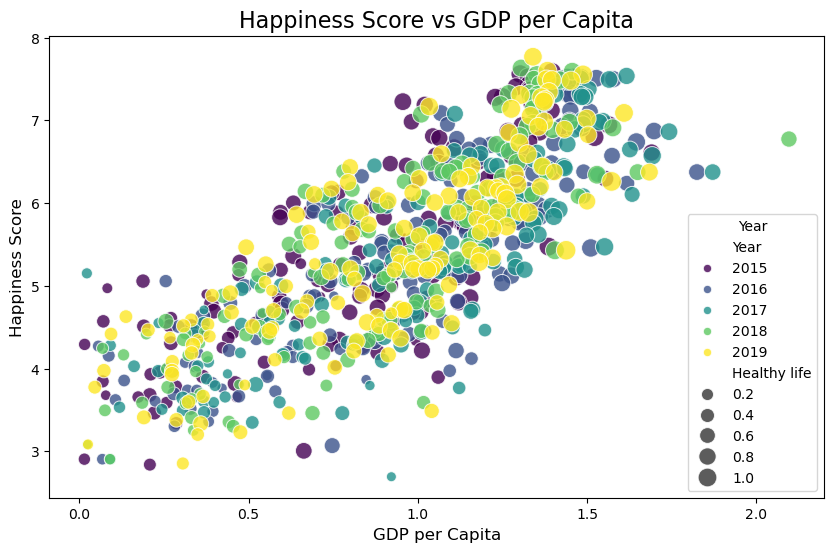

In [13]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='GDP per capita', 
    y='Happiness Score', 
    data=numeric_data, 
    hue='Year', 
    palette='viridis', 
    size='Healthy life', 
    sizes=(50, 200), 
    alpha=0.8
)
plt.title("Happiness Score vs GDP per Capita", fontsize=16)
plt.xlabel("GDP per Capita", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.legend(title="Year")
plt.show()


### Line Plot: Average Happiness Score Over Years

- **Aggregate Data:** Calculate the average `Happiness Score` per year using `groupby()` and `mean()`.
- **Visualize Trends:** Create a line plot with `sns.lineplot()`, highlighting data points using markers (`marker="o"`) and a blue line.
- **Customize Plot:** Add a title, axis labels, and adjust figure size with `plt.figure(figsize=(10, 6))`.


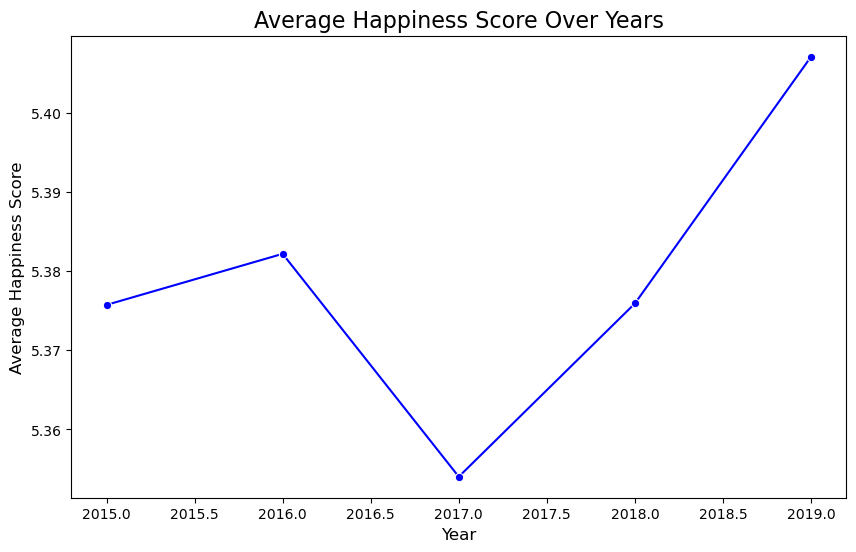

In [15]:
avg_happiness_per_year = numeric_data.groupby('Year')['Happiness Score'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Year', 
    y='Happiness Score', 
    data=avg_happiness_per_year, 
    marker="o", 
    color="blue"
)
plt.title("Average Happiness Score Over Years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Happiness Score", fontsize=12)
plt.show()


### Bar Plot: Happiness Score by Generosity Level

- **Categorize Data:** Use `pd.cut()` to create `Generosity Level` bins and labels based on `Generosity`.
- **Aggregate Data:** Calculate the average `Happiness Score` for each generosity level using `groupby()` and `mean()`.
- **Visualize Results:** Plot a bar chart with `sns.barplot()`, using a blue palette and adding appropriate titles and axis labels.


/var/folders/1t/zpc_3c3d039cn7bcqzxdmsz80000gn/T/ipykernel_12873/3197593281.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_happiness_by_generosity = numeric_data.groupby('Generosity Level')['Happiness Score'].mean().reset_index()
/var/folders/1t/zpc_3c3d039cn7bcqzxdmsz80000gn/T/ipykernel_12873/3197593281.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


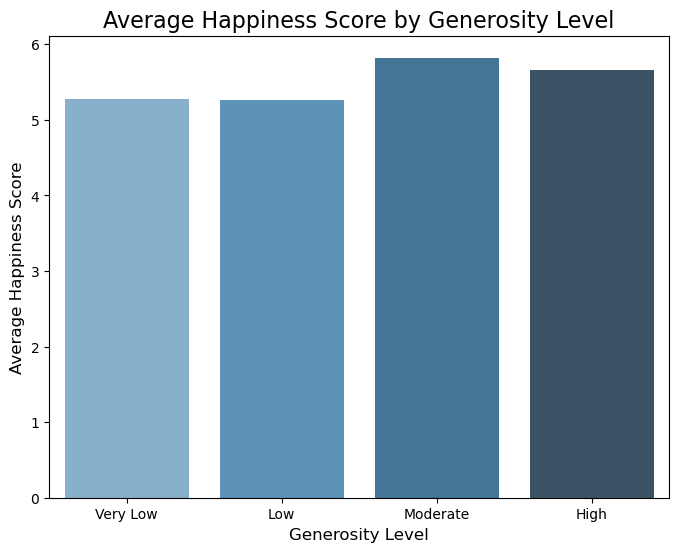

In [17]:
numeric_data['Generosity Level'] = pd.cut(
    numeric_data['Generosity'], 
    bins=[-1, 0.1, 0.3, 0.5, 1], 
    labels=["Very Low", "Low", "Moderate", "High"]
)

avg_happiness_by_generosity = numeric_data.groupby('Generosity Level')['Happiness Score'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(
    x='Generosity Level', 
    y='Happiness Score', 
    data=avg_happiness_by_generosity, 
    palette='Blues_d'
)
plt.title("Average Happiness Score by Generosity Level", fontsize=16)
plt.xlabel("Generosity Level", fontsize=12)
plt.ylabel("Average Happiness Score", fontsize=12)
plt.show()


### Regression Plot: Happiness Score vs Social Support

- **Visualize Relationship:** Use `sns.regplot()` to show the linear relationship between `Social support` and `Happiness Score`.
- **Customize Plot:** Set scatter points to purple (`scatter_kws`) and the regression line to black (`line_kws`).
- **Add Details:** Include a title, axis labels, and adjust the figure size with `plt.figure(figsize=(10, 6))`.


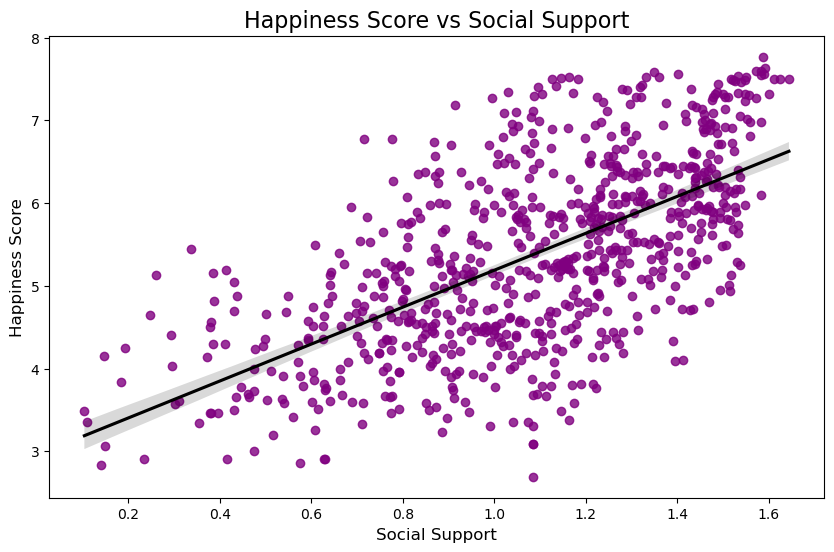

In [19]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Social support', 
    y='Happiness Score', 
    data=numeric_data, 
    scatter_kws={'color': 'purple'}, 
    line_kws={'color': 'black'}
)
plt.title("Happiness Score vs Social Support", fontsize=16)
plt.xlabel("Social Support", fontsize=12)
plt.ylabel("Happiness Score", fontsize=12)
plt.show()


In [20]:
print(numeric_data.dtypes)
print(numeric_data.head())


Happiness rank         int64
Happiness Score      float64
GDP per capita       float64
Social support       float64
Healthy life         float64
Freedom              float64
Generosity           float64
Corruption           float64
Year                   int64
Generosity Level    category
dtype: object
   Happiness rank  Happiness Score  GDP per capita  Social support  \
0               1            7.587         1.39651         1.34951   
1               2            7.561         1.30232         1.40223   
2               3            7.527         1.32548         1.36058   
3               4            7.522         1.45900         1.33095   
4               5            7.427         1.32629         1.32261   

   Healthy life  Freedom  Generosity  Corruption  Year Generosity Level  
0       0.94143  0.66557     0.29678     0.41978  2015              Low  
1       0.94784  0.62877     0.43630     0.14145  2015         Moderate  
2       0.87464  0.64938     0.34139     0.48357  201

### Correlation Heatmap
- Calculate the Pearson correlation matrix for numeric columns and visualize it using `sns.heatmap()` with a Viridis color map.
- Customize the plot with annotations, axis labels, and a title for clarity.


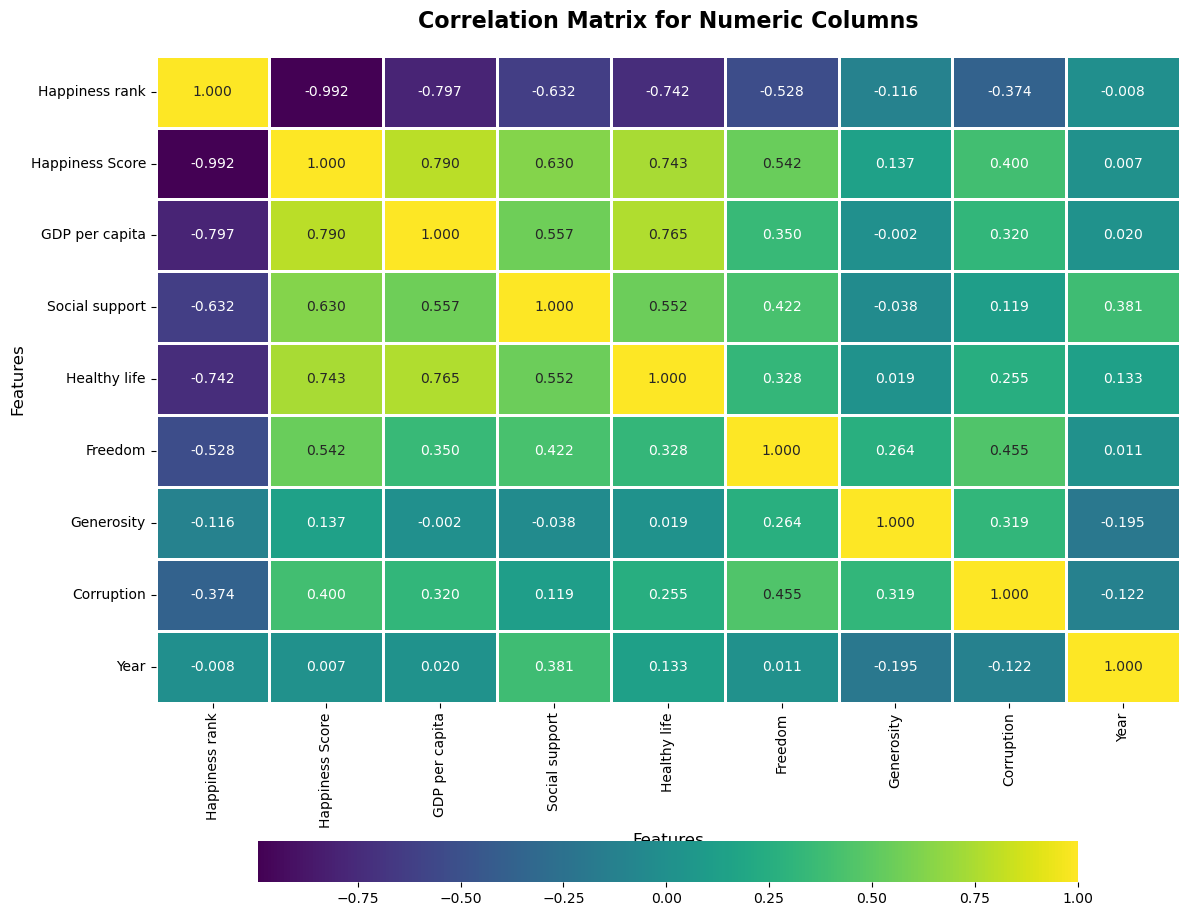

In [22]:
# Exclude non-numeric columns
numeric_data = numeric_data.select_dtypes(include=[np.number])

# Recalculate the correlation matrix
correlation_matrix = numeric_data.corr(method='pearson')

# Proceed with visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="viridis",
    fmt=".3f",
    linewidths=0.75,
    cbar_kws={"orientation": "horizontal", "shrink": 0.8}
)
plt.title("Correlation Matrix for Numeric Columns", fontsize=16, fontweight="bold", pad=20)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.tight_layout()
plt.show()


In [23]:
# Ensure that only numeric columns are considered for causal analysis
numeric_columns = numeric_data.columns
print(f"Numeric columns considered for causal analysis: {numeric_columns.tolist()}")


Numeric columns considered for causal analysis: ['Happiness rank', 'Happiness Score', 'GDP per capita', 'Social support', 'Healthy life', 'Freedom', 'Generosity', 'Corruption', 'Year']


### Define Features and Outcome
- **Create a Copy:** Duplicate the dataset to `df` for analysis.
- **Select Features:** Identify predictor variables (`features`) and the target variable (`outcome_variable`) for the model.


In [25]:
df = data.copy()
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
outcome_variable = 'Happiness Score'

In [26]:
# Filter the dataset for specified features
selected_columns = features + [outcome_variable]
df_filtered = df[selected_columns].copy()

# Display the filtered dataset
print("Filtered Dataset:\n", df_filtered.head())

Filtered Dataset:
    GDP per capita  Social support  Healthy life  Freedom  Happiness Score
0         1.39651         1.34951       0.94143  0.66557            7.587
1         1.30232         1.40223       0.94784  0.62877            7.561
2         1.32548         1.36058       0.87464  0.64938            7.527
3         1.45900         1.33095       0.88521  0.66973            7.522
4         1.32629         1.32261       0.90563  0.63297            7.427


In [27]:
from sklearn.model_selection import train_test_split

# Split the filtered data into training and testing sets
train_data, test_data = train_test_split(df_filtered, test_size=0.2, random_state=42)

print(f"Training set shape: {train_data.shape}")
print(f"Testing set shape: {test_data.shape}")


Training set shape: (625, 5)
Testing set shape: (157, 5)


### Why Use DirectLiNGAM?
- **Purpose:** DirectLiNGAM is a causal discovery algorithm designed to uncover direct causal relationships in non-Gaussian data.
- **Fit the Model:** Use `model.fit(train_data)` to learn causal structures directly from the training dataset.
- **Key Advantage:** It identifies causal directions and adjusts for confounders, making it ideal for data with complex causal relationships.


In [29]:
from lingam import DirectLiNGAM

# Fit the DirectLiNGAM model
model = DirectLiNGAM()
model.fit(train_data)


### Heatmap: Pearson Correlation
Visualize the Pearson correlation matrix for `df_filtered` using a heatmap with the "coolwarm" color map.


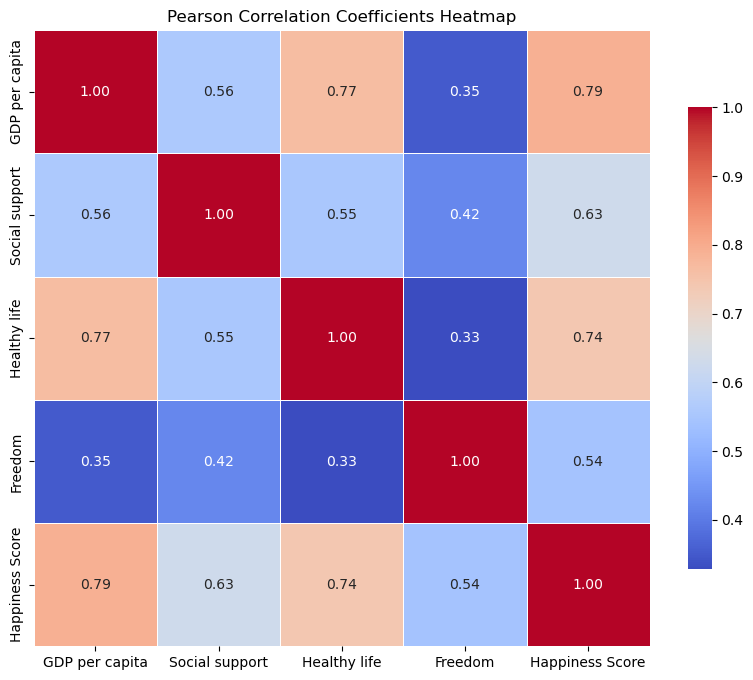

In [31]:
import seaborn as sns
# Calculate Pearson correlation coefficients
correlation_matrix = df_filtered.corr(method='pearson')

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",  # Format for the annotations (2 decimal places)
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.75}  # Adjust color bar size
)

plt.title("Pearson Correlation Coefficients Heatmap")
plt.show()

In [32]:
import numpy as np

# Check if the matrix has non-zero values
print("Adjacency Matrix:\n", model.adjacency_matrix_)
print("Matrix Shape:", model.adjacency_matrix_.shape)

# Check for non-zero values
non_zero_entries = np.count_nonzero(model.adjacency_matrix_)
print("Number of Non-Zero Entries in the Adjacency Matrix:", non_zero_entries)


Adjacency Matrix:
 [[0.         0.         0.         0.         0.        ]
 [0.43471882 0.         0.         0.         0.        ]
 [0.40389692 0.13042415 0.         0.         0.        ]
 [0.07609773 0.1491347  0.         0.         0.        ]
 [1.17004867 0.52218426 1.18506192 1.90623347 0.        ]]
Matrix Shape: (5, 5)
Number of Non-Zero Entries in the Adjacency Matrix: 9


### Plot Filtered Causal Graph

- **Purpose:** Visualize a causal graph based on an adjacency matrix, showing only relationships above a defined threshold.

- **Steps:**
  1. **Create a Directed Graph:** Use `networkx.DiGraph()` to represent causal relationships as directed edges.
  2. **Add Nodes and Edges:**
     - Nodes represent variables (e.g., features) labeled with `labels`.
     - Edges are added based on the adjacency matrix values exceeding the `threshold`.
  3. **Customize Visualization:**
     - Use `nx.spring_layout()` for node placement.
     - Customize node size, color, and labels for better readability.
     - Include edge labels with causal weights (`weight`).
  4. **Display the Graph:** Render the graph with a clear title and layout adjustments.

- **Outcome:** A visual representation of significant causal relationships, filtered by the specified `threshold`, to focus on strong influences.


In [34]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_filtered_causal_graph(adj_matrix, labels, threshold=0.3):
    """
    Plots a causal graph based on the adjacency matrix, filtering edges by a threshold.

    Parameters:
        adj_matrix (np.ndarray): The adjacency matrix representing relationships.
        labels (list): List of labels corresponding to the nodes.
        threshold (float): Minimum weight for edges to be included in the graph.
    """
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes with labels
    for i, label in enumerate(labels):
        G.add_node(i, label=label)

    # Add edges based on threshold
    for i in range(adj_matrix.shape[0]):
        for j in range(adj_matrix.shape[1]):
            if adj_matrix[i, j] >= threshold:  # Include edges above the threshold
                G.add_edge(i, j, weight=adj_matrix[i, j])

    # Get node labels for visualization
    node_labels = nx.get_node_attributes(G, 'label')
    pos = nx.spring_layout(G)  # Layout for graph

    # Set up a larger figure
    plt.figure(figsize=(20, 15))  # Increase figure size for larger graph

    # Draw nodes and labels
    nx.draw_networkx_nodes(G, pos, node_size=1500, node_color='skyblue')  # Larger nodes
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=16)  # Larger labels

    # Draw edges with weights
    edge_labels = {(i, j): f"{d['weight']:.2f}" for i, j, d in G.edges(data=True)}
    nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, width=2)  # Larger arrows and thicker edges
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=14)  # Larger edge labels

    # Display the graph
    plt.title("Filtered Causal Graph", fontsize=20, fontweight="bold")  # Larger title
    plt.tight_layout()  # Ensure everything fits well
    plt.show()


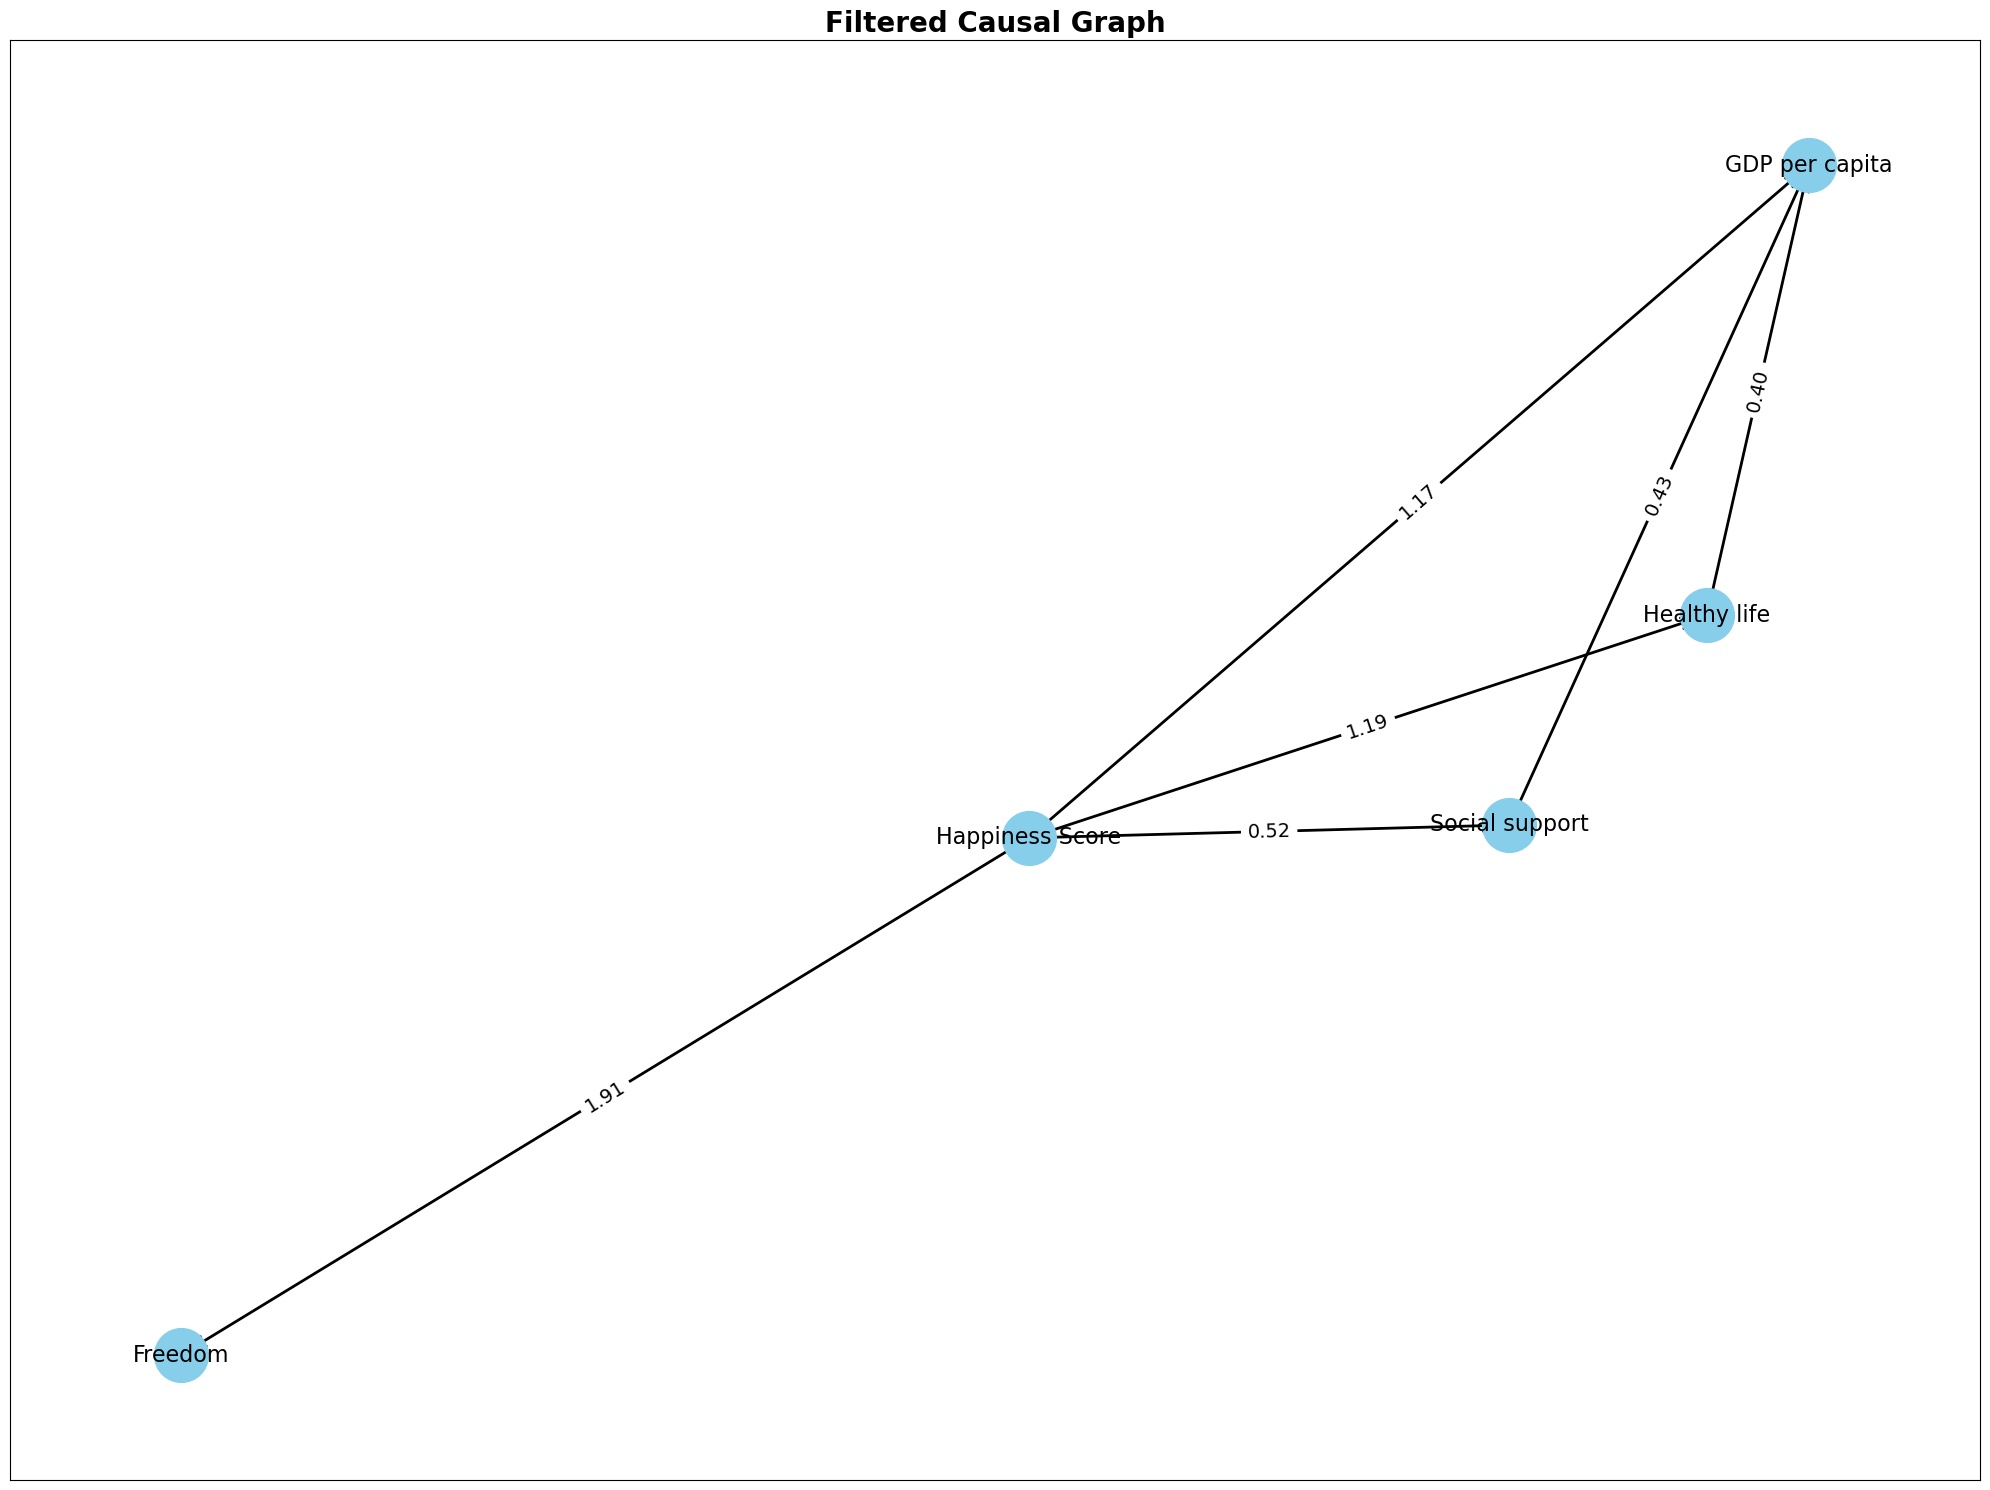

In [35]:
plot_filtered_causal_graph(
    adj_matrix=model.adjacency_matrix_,
    labels=selected_columns,
    threshold=0.3 # Adjust threshold as needed
)


### Inference from the Causal Graph (above graph):

1. **Central Node:**  
   - **`Happiness Score`** is the central outcome variable, influenced by other features such as `GDP per capita`, `Social support`, `Healthy life`, and `Freedom`.

2. **Strongest Causal Relationships:**
   - **`Freedom → Happiness Score (1.91):**  
     `Freedom` has the strongest positive causal effect on `Happiness Score`, suggesting that improvements in `Freedom` significantly enhance happiness.
   - **`Healthy life → Happiness Score (1.17):**  
     A higher `Healthy life` expectancy positively impacts happiness, with a strong influence.

3. **Moderate Effects:**
   - **`Social support → Happiness Score (0.52):**  
     `Social support` moderately contributes to happiness, indicating its importance in improving well-being.
   - **`GDP per capita → Happiness Score (0.43):**  
     Economic factors like `GDP per capita` have a weaker, but still positive, impact on happiness.

4. **Key Observations:**
   - Among all features, **`Freedom`** exerts the most substantial causal influence on happiness.
   - The smaller weights for `Social support` and `GDP per capita` suggest their effects are secondary compared to `Freedom` and `Healthy life`.

5. **Implications:**
   - Policymakers aiming to enhance happiness should focus on improving `Freedom` and health (`Healthy life`), as these have the strongest causal effects.
   - Social and economic improvements (`Social support` and `GDP per capita`) are supportive but less impactful in comparison.

This graph provides actionable insights into the relative importance of different factors influencing happiness.

In [37]:
adj_matrix = model.adjacency_matrix_
print("Adjacency Matrix:\n", adj_matrix)


Adjacency Matrix:
 [[0.         0.         0.         0.         0.        ]
 [0.43471882 0.         0.         0.         0.        ]
 [0.40389692 0.13042415 0.         0.         0.        ]
 [0.07609773 0.1491347  0.         0.         0.        ]
 [1.17004867 0.52218426 1.18506192 1.90623347 0.        ]]


In [38]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Ensure feature alignment
features = ['GDP per capita', 'Social support', 'Healthy life', 'Freedom']
adj_matrix = model.adjacency_matrix_

for i, feature in enumerate(features):
    print(f"\nCausal Inference for {feature} as the treatment variable:")

    # Extract coefficients for the current feature (excluding unrelated features)
    feature_coefs = adj_matrix[i, :len(features)]  # Align with feature count

    # Predict Happiness Score using aligned coefficients
    test_data['Predicted Happiness Score'] = np.dot(
        test_data[features].values, feature_coefs
    )

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(test_data['Happiness Score'], test_data['Predicted Happiness Score'])
    print(f"Estimated Average Treatment Effect (MSE) for {feature}: {mse}")



Causal Inference for GDP per capita as the treatment variable:
Estimated Average Treatment Effect (MSE) for GDP per capita: 30.253717729574678

Causal Inference for Social support as the treatment variable:
Estimated Average Treatment Effect (MSE) for Social support: 25.772319062302603

Causal Inference for Healthy life as the treatment variable:
Estimated Average Treatment Effect (MSE) for Healthy life: 24.63284338597129

Causal Inference for Freedom as the treatment variable:
Estimated Average Treatment Effect (MSE) for Freedom: 27.68750163272116


### Key Findings:
1. **Most Impactful Feature:** `Healthy life` (MSE = 24.63) has the strongest causal effect on `Happiness Score`.
2. **Second Most Impactful:** `Social support` (MSE = 25.77) also significantly influences happiness.
3. **Moderate Impact:** `Freedom` (MSE = 27.69) and `GDP per capita` (MSE = 30.25) have weaker causal effects compared to the top two features.
4. **Priority Areas:** Focus on improving `Healthy life` and `Social support` to maximize happiness outcomes.

In [40]:
# Calculate ATE for each feature
for i, feature in enumerate(features):
    treatment_effect = np.mean(test_data[features].values @ adj_matrix[i, :len(features)])
    print(f"Average Treatment Effect (ATE) of {feature} on Happiness Score: {treatment_effect}")


Average Treatment Effect (ATE) of GDP per capita on Happiness Score: 0.0
Average Treatment Effect (ATE) of Social support on Happiness Score: 0.4070210536951404
Average Treatment Effect (ATE) of Healthy life on Happiness Score: 0.5191351788748655
Average Treatment Effect (ATE) of Freedom on Happiness Score: 0.23244523024623634



### Why and Findings:
1. **Why ATE Calculation?**  
   - The Average Treatment Effect (ATE) quantifies the average causal impact of each feature on the outcome (`Happiness Score`), helping prioritize factors for interventions.

2. **Findings:**  
   - **Highest ATE:** `Healthy life` (0.52) has the strongest positive causal impact on happiness.  
   - **Moderate ATE:** `Social support` (0.41) and `Freedom` (0.23) also positively influence happiness.  
   - **No Impact:** `GDP per capita` has negligible causal influence (ATE = 0.0).

3. **Implication:**  
   - Prioritize improving `Healthy life` and `Social support` for the greatest impact on happiness.

Conditional Average Treatment Effect (CATE) of GDP per capita on Happiness Score (High Social Support): 0.0


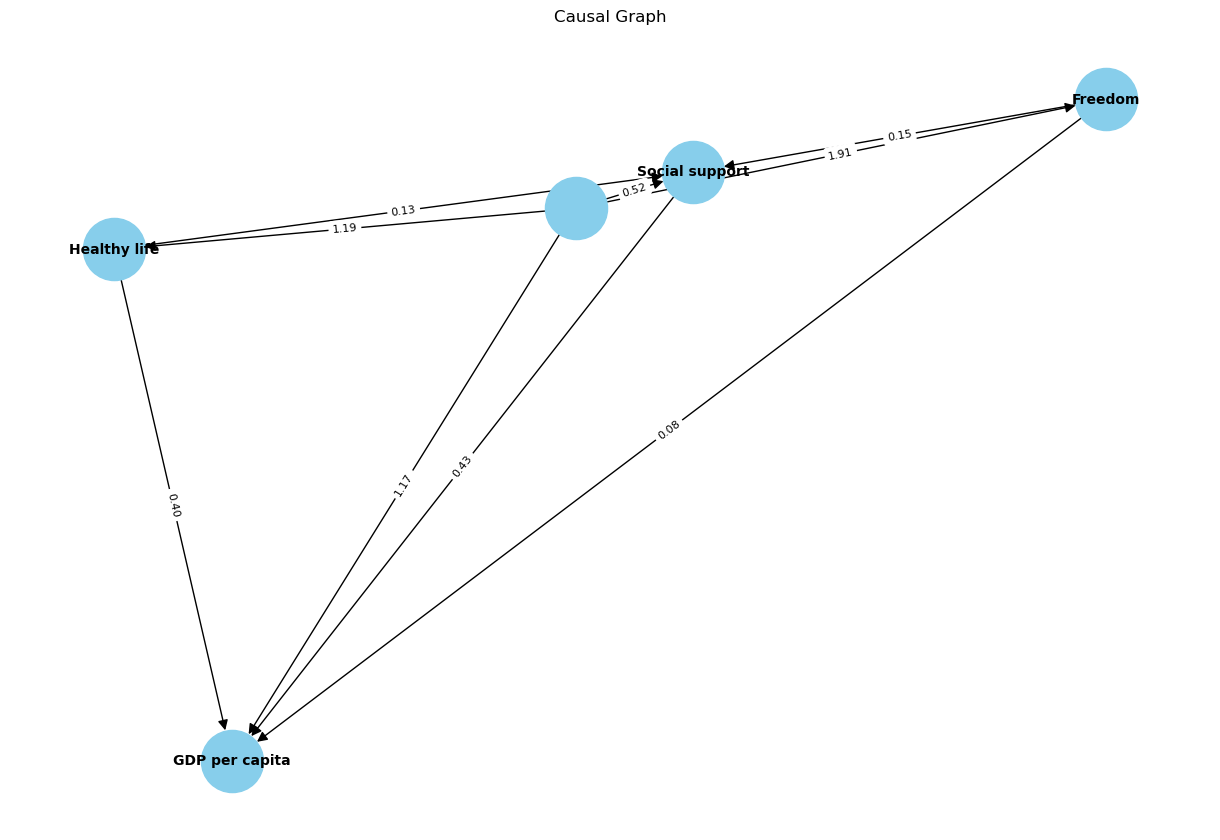

     Happiness Score  Counterfactual Happiness Score
596            4.350                             0.0
588            4.441                             0.0
208            5.976                             0.0
291            4.121                             0.0
174            6.952                             0.0


In [42]:
high_social_support = test_data[test_data['Social support'] > test_data['Social support'].mean()]

# Extract relevant rows from the adjacency matrix for GDP per capita
gdp_index = features.index('GDP per capita')
feature_coefs = adj_matrix[gdp_index, :len(features)]

# Compute CATE by taking the dot product for all filtered rows
cate_gdp = np.mean(
    np.dot(high_social_support[features].values, feature_coefs)
)

print(f"Conditional Average Treatment Effect (CATE) of GDP per capita on Happiness Score (High Social Support): {cate_gdp}")

# Step 5: Visualize the causal graph
G = nx.DiGraph()

# Add nodes (features)
for i, feature in enumerate(features):
    G.add_node(i, label=feature)

# Add edges (causal relationships)
for i in range(adj_matrix.shape[0]):
    for j in range(adj_matrix.shape[1]):
        if adj_matrix[i, j] != 0:  # Add only non-zero relationships
            G.add_edge(i, j, weight=adj_matrix[i, j])

# Set positions and plot
pos = nx.spring_layout(G)
labels = nx.get_node_attributes(G, 'label')

plt.figure(figsize=(12, 8))
nx.draw(
    G, pos, labels=labels, with_labels=True, node_size=2000,
    node_color='skyblue', font_size=10, font_weight='bold', arrowsize=15
)
edge_labels = {(i, j): f"{d['weight']:.2f}" for i, j, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("Causal Graph")
plt.show()

# Step 6: Counterfactual Analysis
counterfactual_data = test_data.copy()
counterfactual_data['GDP per capita'] += 0.5  # Simulate an intervention

# Predict Happiness Score under the counterfactual scenario
counterfactual_data['Counterfactual Happiness Score'] = np.dot(
    counterfactual_data[features].values, adj_matrix[gdp_index, :len(features)]
)

# Compare original vs counterfactual
print(counterfactual_data[[outcome_variable, 'Counterfactual Happiness Score']].head())

### **Conclusion**

This notebook demonstrates the power of causality in uncovering meaningful relationships between variables and identifying the key drivers behind outcomes, such as happiness scores. By utilizing techniques like DirectLiNGAM, visualizations, and metrics such as the Average Treatment Effect (ATE), it provides a deeper understanding of how features like `Healthy Life` and `Social Support` contribute to well-being. The analysis highlights the importance of causal inference in drawing actionable insights from data, offering a framework for more informed decision-making.

### References

- LiNGAM Documentation: Comprehensive guide on implementing the DirectLiNGAM algorithm for causal discovery. [https://lingam.readthedocs.io/en/latest/]
- DAGitty: An online tool for creating and analyzing causal diagrams (Directed Acyclic Graphs). [https://dagitty.net/]
- Harvard Online Course: "Causal Diagrams: Draw Your Assumptions Before Your Conclusions" – A course on the use of causal diagrams in scientific research. [https://www.harvardonline.harvard.edu/course/causal-diagrams-draw-your-assumptions-your-conclusions]
- DoWhy Library: A Python library for causal inference that supports explicit modeling and testing of causal assumptions. [https://github.com/py-why/dowhy]
- “Causal Inference: What If” Book by Hernán and Robins [https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/]

### MIT License

Copyright (c) 2024 **NOISHEE (Nishita Vijay Matlani)**

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES, OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT, OR OTHERWISE, ARISING FROM, OUT OF, OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.